In [7]:
import pandas as pd
gas = pd.read_csv("./datas/gas/dataset.csv")
print(gas.tar.value_counts())
print(gas.tar.value_counts()/len(gas))

tar
5    3009
2    2926
1    2565
4    1936
6    1833
3    1641
Name: count, dtype: int64
tar
5    0.216319
2    0.210352
1    0.184400
4    0.139180
6    0.131776
3    0.117973
Name: count, dtype: float64


#### 标准化

In [8]:
def min_max_normalize(x):
    return (x - x.min()) / (x.max() - x.min())
for col in gas.columns:
    if col == 'tar':
        continue
    gas[col] = min_max_normalize(gas[col])

gas.to_csv("./datas/gas/okGas.csv", index = False)

#### 划分数据集

In [9]:
from sklearn import model_selection
gas.to_csv("./datas/cancer/okDatas.csv", index = False)
y = gas['tar']
gas = gas.drop(columns='tar')
X = gas
gas_minmax_train, gas_minmax_test, gas_train_labels, gas_test_labels = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

#### 以下是朴素贝叶斯

d:\python\Lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
d:\python\Lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
d:\python\Lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
d:\python\Lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
d:\python\Lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
d:\python\Lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


              precision    recall  f1-score   support

           1       0.90      0.54      0.68       765
           2       0.99      0.63      0.77       904
           3       0.57      0.51      0.54       463
           4       0.36      0.37      0.36       568
           5       0.78      0.56      0.65       888
           6       0.33      0.86      0.48       585

    accuracy                           0.58      4173
   macro avg       0.65      0.58      0.58      4173
weighted avg       0.70      0.58      0.61      4173

[[414   1  17 171  56 106]
 [ 10 571 160   6  16 141]
 [  8   5 235   9  18 188]
 [ 29   0   0 208  22 309]
 [  0   0   1 133 493 261]
 [  0   0   0  58  24 503]]
0.5808770668583753


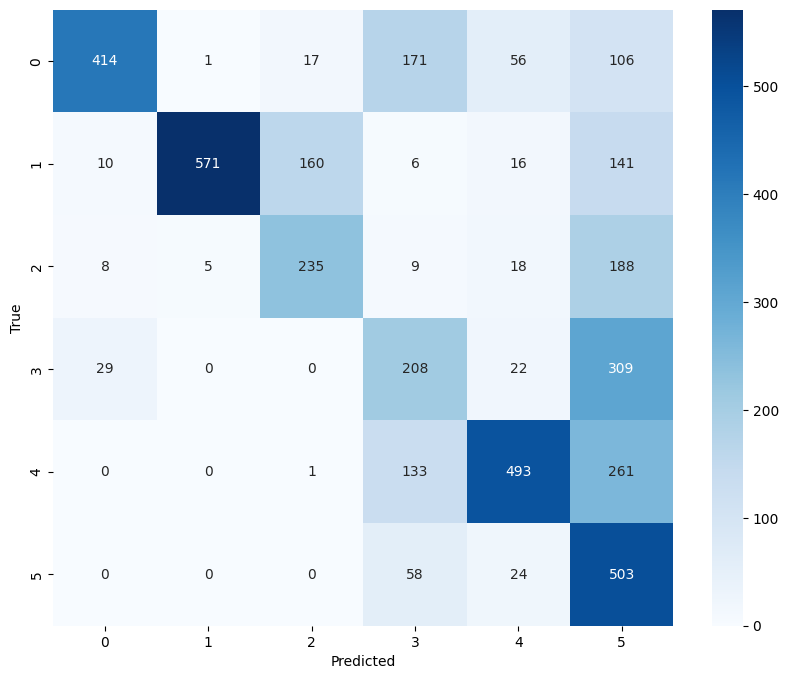

In [10]:
from models import navieBayes # 调用自己复现的贝叶斯分类器
naviBys = navieBayes.navieBayes() # 调用模型
naviBys.fit(gas_minmax_train, gas_train_labels)
gas_test_pred = naviBys.predict(gas_minmax_test)
from sklearn import metrics
print(metrics.classification_report(gas_test_labels, gas_test_pred))
print(metrics.confusion_matrix(gas_test_labels, gas_test_pred))
print(metrics.accuracy_score(gas_test_labels, gas_test_pred))
from models import drawCM
drawCM.ConfusionMatrixPlotter(metrics.confusion_matrix(gas_test_labels, gas_test_pred)).plot()

#### 以下是高斯朴素贝叶斯

准确率为：0.5808770668583753
              precision    recall  f1-score   support

           1       0.90      0.54      0.68       765
           2       0.99      0.63      0.77       904
           3       0.57      0.51      0.54       463
           4       0.36      0.37      0.36       568
           5       0.78      0.56      0.65       888
           6       0.33      0.86      0.48       585

    accuracy                           0.58      4173
   macro avg       0.65      0.58      0.58      4173
weighted avg       0.70      0.58      0.61      4173

[[414   1  17 171  56 106]
 [ 10 571 161   6  16 140]
 [  8   5 235   9  18 188]
 [ 29   0   0 208  22 309]
 [  0   0   1 133 493 261]
 [  0   0   0  58  24 503]]
0.5808770668583753


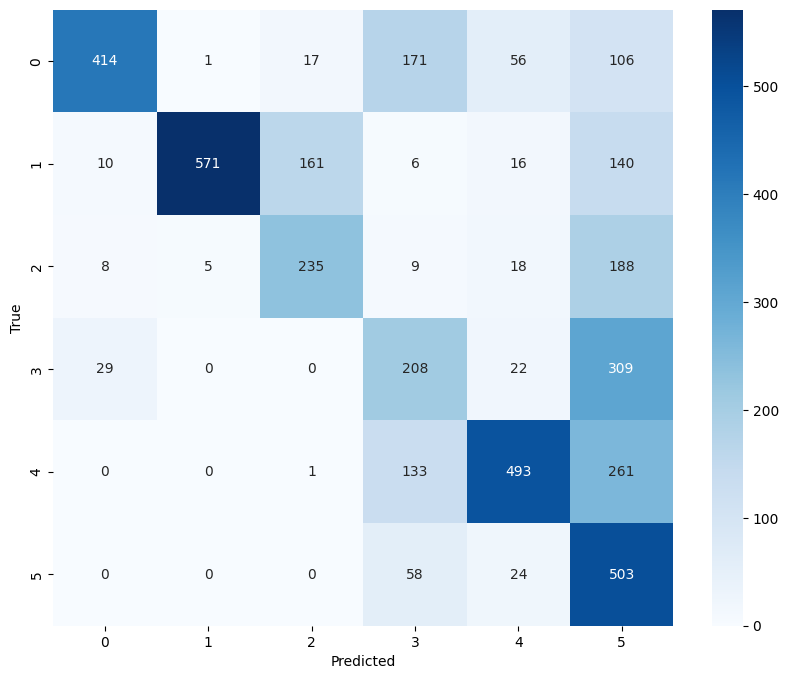

In [11]:
from sklearn.naive_bayes import GaussianNB  # 导入高斯朴素贝叶斯
nb = GaussianNB()  # 实例化模型对象
nb.fit(gas_minmax_train, gas_train_labels)  # 训练模型

# 给模型评分
score = nb.score(gas_minmax_test, gas_test_labels)
print("准确率为：{}".format(score))
# 预测
pred_result1 = nb.predict(gas_minmax_test)
true_result1 = gas_test_labels
print(metrics.classification_report(true_result1, pred_result1))
print(metrics.confusion_matrix(true_result1, pred_result1))
print(metrics.accuracy_score(true_result1, pred_result1))
from models import drawCM
drawCM.ConfusionMatrixPlotter(metrics.confusion_matrix(true_result1, pred_result1)).plot()

#### 以下是朴素SVM

              precision    recall  f1-score   support

           1       0.98      0.96      0.97       765
           2       0.97      1.00      0.98       904
           3       1.00      0.94      0.97       463
           4       0.88      0.99      0.93       568
           5       0.99      0.98      0.98       888
           6       0.99      0.91      0.95       585

    accuracy                           0.97      4173
   macro avg       0.97      0.96      0.96      4173
weighted avg       0.97      0.97      0.97      4173

[[734   6   0  25   0   0]
 [  2 902   0   0   0   0]
 [  1  17 437   0   7   1]
 [  5   1   0 560   1   1]
 [  3   3   2   6 870   4]
 [  1   0   0  48   1 535]]
0.9676491732566499


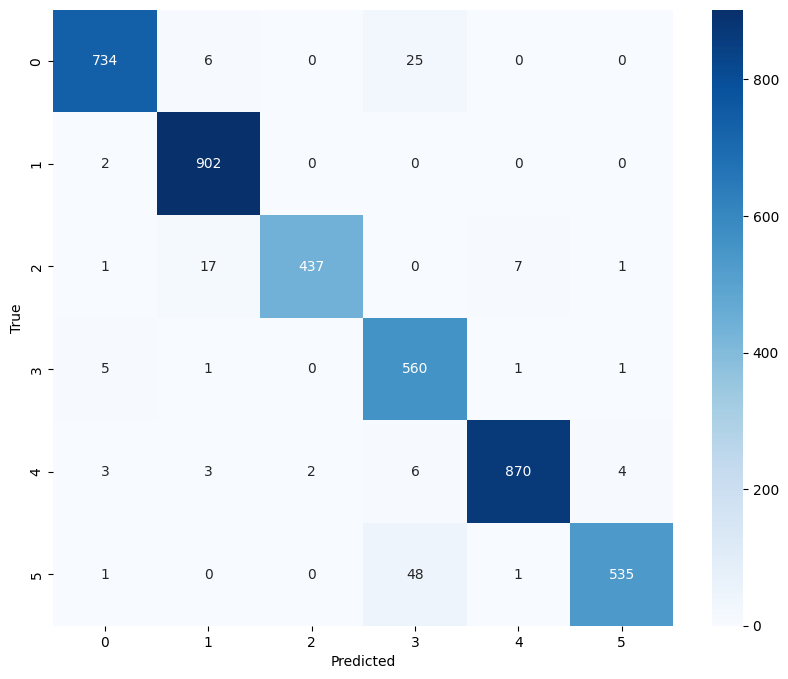

In [12]:
from sklearn import svm
data = pd.read_csv("./datas/gas/okGas.csv")
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)
svc = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
gas_test_pred_svm = svc.predict(X_test)
print(metrics.classification_report(y_test, gas_test_pred_svm))
print(metrics.confusion_matrix(y_test, gas_test_pred_svm))
print(metrics.accuracy_score(y_test, gas_test_pred_svm))
from models import drawCM
drawCM.ConfusionMatrixPlotter(metrics.confusion_matrix(y_test, gas_test_pred_svm)).plot()